In [2]:
# Import necessary libraries and modules
import sys
import os

# Add the project root directory to the Python path
sys.path.append(os.path.dirname(os.getcwd()))

import random
import time
from typing import List, Dict, Tuple, Optional
from src.backtracking import *
from src.graph import *
import matplotlib.pyplot as plt

In [3]:

def generate_gnp_graph(n: int, p: float) -> Graph:
    """
    Create a random graph.
    In this model, we start with n vertices and then for each pair of vertices,
    we add an edge between them with probability p. This creates graphs with
    different densities depending on the value of p.
    """
    edges = []
    for u in range(n):
        for v in range(u + 1, n):
            # With probability p, add an edge between u and v
            if random.random() < p:
                edges.append((u, v))
    return Graph.from_edge_list(n, edges)

def experiment_size(ns, p=0.5, trials=3, use_degree_order=True):
    """
    Run experiments to see how backtracking performs on graphs of different sizes.
    This function tests the backtracking algorithm on graphs with different numbers
    of vertices (n) but the same edge probability (p). For each size, it runs multiple
    trials and averages the results.
    """
    results = []
    for n in ns:
        chis, nodes, times = [], [], []
        # Run multiple trials and average the results
        for _ in range(trials):
            g = generate_gnp_graph(n, p)
            res = backtracking_coloring(g, use_degree_order=use_degree_order)
            # Record the results
            chis.append(res.num_colors)
            nodes.append(res.nodes_visited)
            times.append(res.time_seconds)
        results.append((n,
                        sum(chis) / len(chis),     
                        int(sum(nodes) / len(nodes)), 
                        sum(times) / len(times)))  
    return results

def experiment_density(ps, n=12, trials=5, use_degree_order=True):
    """
    Run experiments to see how backtracking performs on graphs with different densities.
    This function tests the backtracking algorithm on graphs with the same number of
    vertices (n) but different edge probabilities (p). Higher p means more edges.
    For each density, it runs multiple trials and averages the results.
    """
    results = []
    # Test each edge probability
    for p in ps:
        chis, nodes, times = [], [], []
        # Run multiple trials and average the results
        for _ in range(trials):
            g = generate_gnp_graph(n, p)
            res = backtracking_coloring(g, use_degree_order=use_degree_order)
            # Record the results
            chis.append(res.num_colors)
            nodes.append(res.nodes_visited)
            times.append(res.time_seconds)
        # Calculate averages and add to results
        results.append((p,
                        sum(chis) / len(chis),
                        int(sum(nodes) / len(nodes)), 
                        sum(times) / len(times)))
    return results

def experiment_ordering(n=14, p=0.3, trials=5):
    """
    Compare natural vertex ordering vs degree-based ordering.
    This function tests whether ordering vertices by degree (highest degree first)
    performs better than using the natural order (0, 1, 2, ...). It runs the same
    graphs with both orderings and compares the results.
    """
    nat_res = []
    deg_res = []
    for _ in range(trials):
        g = generate_gnp_graph(n, p)
        # Run with natural ordering (vertices in order 0, 1, 2, ...)
        nat = backtracking_coloring(g, use_degree_order=False)
        # Run with degree-based ordering (vertices with more neighbors first)
        deg = backtracking_coloring(g, use_degree_order=True)
        nat_res.append(nat)
        deg_res.append(deg)

    def summarize(res_list):
        """
        Calculate average results from a list of result objects.
        """
        return (
            sum(r.num_colors for r in res_list) / len(res_list),
            int(sum(r.nodes_visited for r in res_list) / len(res_list)),
            sum(r.time_seconds for r in res_list) / len(res_list),
        )

    # Return summarized results for both orderings
    return summarize(nat_res), summarize(deg_res)



def plot_experiments():
    """
    Create and save plots showing how backtracking performance changes with graph size and density.
    
    This function runs experiments and creates four plots:
    1. How many nodes are visited as graph size increases
    2. How runtime changes as graph size increases
    3. How many nodes are visited as graph density increases
    4. How runtime changes as graph density increases
    """
    # Experiment 1: Test how performance changes with graph size (number of vertices)
    ns = [5,10,15,20,25,30]
    size_results = experiment_size(ns, p=0.5, trials=3, use_degree_order=True)

    # Extract the data from results for plotting
    n_list = [r[0] for r in size_results]      # Graph sizes
    chi_list = [r[1] for r in size_results]     # Number of colors (not used in plots)
    nodes_list = [r[2] for r in size_results]   # Nodes visited
    time_list = [r[3] for r in size_results]    # Runtime

    # Plot 1: Show how many nodes are visited as graph size increases
    plt.figure()
    plt.plot(n_list, nodes_list, marker="o")
    plt.xlabel("Number of vertices n")
    plt.ylabel("Average nodes visited")
    plt.title("Backtracking: nodes visited vs n (p = 0.5)")
    plt.tight_layout()
    plt.savefig("backtracking_nodes_vs_n.png")

    # Plot 2: Show how runtime changes as graph size increases
    plt.figure()
    plt.plot(n_list, time_list, marker="o")
    plt.xlabel("Number of vertices n")
    plt.ylabel("Average runtime (seconds)")
    plt.title("Backtracking: runtime vs n (p = 0.5)")
    plt.tight_layout()
    plt.savefig("backtracking_time_vs_n.png")

    # Experiment 2: Test how performance changes with graph density (edge probability)
    ps = [0.1, 0.3, 0.5, 0.7, 0.9]
    density_results = experiment_density(ps, n=12, trials=5, use_degree_order=True)

    # Extract the data from results for plotting
    p_list = [r[0] for r in density_results]      # Edge probabilities
    nodes_p_list = [r[2] for r in density_results] # Nodes visited
    time_p_list = [r[3] for r in density_results]  # Runtime

    # Plot 3: Show how many nodes are visited as graph density increases
    plt.figure()
    plt.plot(p_list, nodes_p_list, marker="o")
    plt.xlabel("Edge probability p")
    plt.ylabel("Average nodes visited")
    plt.title("Backtracking: nodes visited vs p (n = 12)")
    plt.tight_layout()
    plt.savefig("backtracking_nodes_vs_p.png")

    # Plot 4: Show how runtime changes as graph density increases
    plt.figure()
    plt.plot(p_list, time_p_list, marker="o")
    plt.xlabel("Edge probability p")
    plt.ylabel("Average runtime (seconds)")
    plt.title("Backtracking: runtime vs p (n = 12)")
    plt.tight_layout()
    plt.savefig("backtracking_time_vs_p.png")

Experiment: varying n (p = 0.5)
(5, 2.6666666666666665, 9, 6.9141387939453125e-06)
(10, 3.3333333333333335, 19, 1.3033548990885416e-05)
(15, 4.333333333333333, 71, 5.38031260172526e-05)
(20, 5.666666666666667, 234, 0.0002472400665283203)
(25, 7.0, 518, 0.0007670720418294271)
(30, 7.0, 3585, 0.005519469579060872)
Experiment: varying p (n = 20)
(0.1, 2.8, 61, 2.765655517578125e-05)
(0.3, 4.4, 200, 0.00015349388122558593)
(0.5, 5.6, 234, 0.00027718544006347654)
(0.7, 8.2, 135, 0.00023345947265625)
(0.9, 12.0, 51, 0.00012836456298828124)
Experiment: natural order vs degree order (n = 20, p = 0.3)
Natural order: (4.2, 2157, 0.0015859127044677735)
Degree order: (4.2, 383, 0.000295257568359375)
Plots saved as PNG files in the current directory.


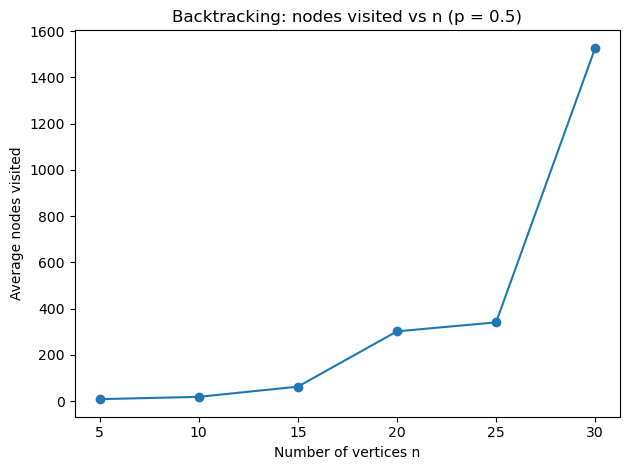

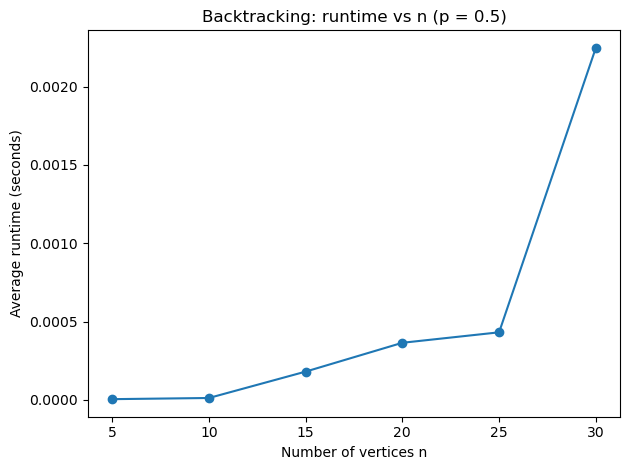

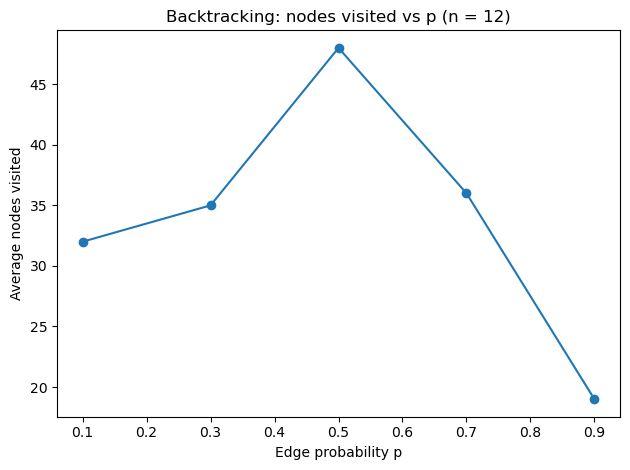

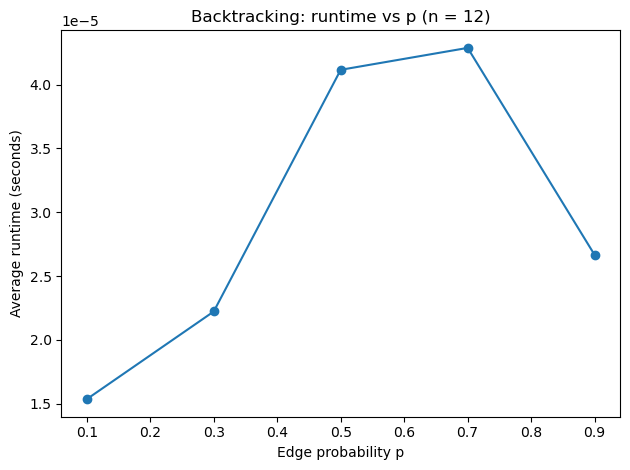

In [4]:
# Run experiments and print the results

# Experiment 1: See how performance changes as we increase the number of vertices
# We keep the edge probability fixed at 0.5
print("Experiment: varying n (p = 0.5)")
for r in experiment_size([5,10,15,20,25,30], p=0.5):
    print(r)

# Experiment 2: See how performance changes as we change graph density
# We keep the number of vertices fixed at 20
print("Experiment: varying p (n = 20)")
for r in experiment_density([0.1, 0.3, 0.5, 0.7, 0.9], n=20):
    print(r)

# Experiment 3: Compare two different vertex ordering strategies
# Natural order: color vertices in order 0, 1, 2, ...
# Degree order: color vertices with more neighbors first
print("Experiment: natural order vs degree order (n = 20, p = 0.3)")
nat, deg = experiment_ordering(n=20, p=0.3)
print("Natural order:", nat)
print("Degree order:", deg)

# Create and save plots showing the results
plot_experiments()
print("Plots saved as PNG files in the current directory.")